In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [75]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 24])


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [76]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,Ca_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD182040_clean.txt,22608.0,22607.0,22609.0,-0.8737,0.0,-0.4275,6.0,0.0,0.0,10.947601,315.0665,0,0
1,HD182040_clean.txt,22626.0,22624.0,22628.0,-0.9360,0.0,-0.4764,6.0,0.0,0.0,13.039257,455.0522,0,0
2,HD182040_clean.txt,22651.0,22649.0,22652.0,0.3336,0.0,-0.3074,6.0,0.0,0.0,23.697100,484.1000,0,0


In [77]:
X = "Ca"
np.mean(output_trimmed[f"{X}_Fe"]).round(2)

np.float64(-0.4)

In [78]:
(solar_abundances[X] + np.mean(output_trimmed[f"{X}_Fe"])).round(2)

np.float64(5.97)

In [31]:
solar_abundances['Mg']+0.17

7.72

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [23]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-01-43-56_0.3760154484208762_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


4.0 0.00018114782983592333 22
4.5 0.00010368385880897786 22
5.0 5.892647655702227e-05 22
5.5 1.3606042632245207e-05 22
6.0 -2.3042304552744278e-05 22
6.5 -6.32090657504667e-05 22


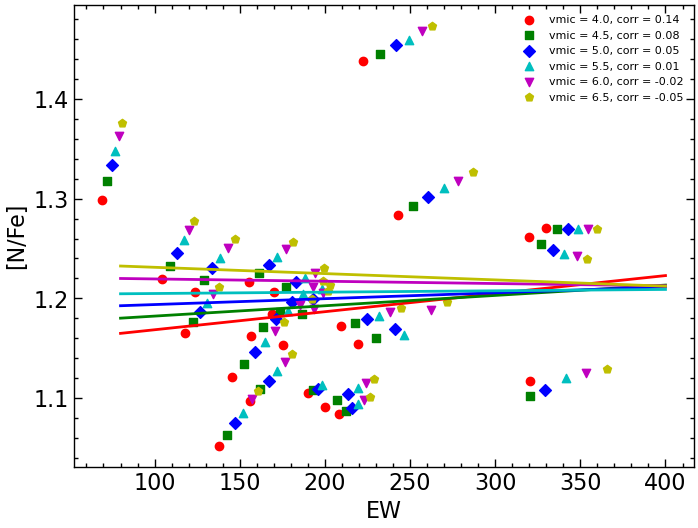

In [25]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.logical_and(np.abs(nfes - mean_nfe) < 3*std_nfe, True))
    choose_idxs = choose_idxs[0]

    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(80, 400, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [53]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed["C_Fe"] + solar_abundances["C"] > 9.5]
output_trimmed = output_trimmed[output_trimmed["C_Fe"] + solar_abundances["C"] < 10.2]


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


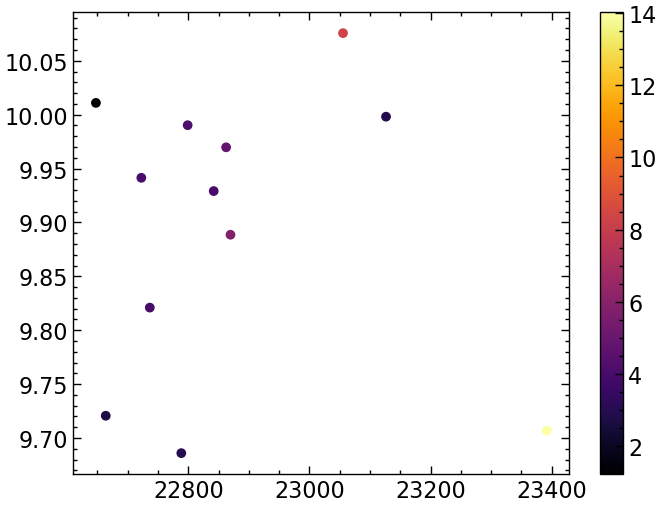

In [54]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['C_Fe']+solar_abundances['C'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [55]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD182040_clean.txt,22647.50,22646.0,22649.0,-0.0622,0.0,1.4509,6.0,0.0,0.0,1.231982,83.4956,0,0
1,HD182040_clean.txt,22663.75,22662.5,22665.0,-2.0610,0.0,1.1607,6.0,0.0,0.0,2.702571,182.0666,0,0
2,HD182040_clean.txt,22722.50,22721.0,22724.0,-0.9471,0.0,1.3814,6.0,0.0,0.0,4.071729,86.0139,0,10000
3,HD182040_clean.txt,22736.50,22735.0,22738.0,-2.1347,0.0,1.2610,6.0,0.0,0.0,4.001844,226.3758,0,0
4,HD182040_clean.txt,22788.50,22787.0,22790.0,-2.1152,0.0,1.1260,6.0,0.0,0.0,3.014438,231.0174,0,0
5,HD182040_clean.txt,22799.00,22797.0,22801.0,-0.5490,0.0,1.4302,6.0,0.0,0.0,4.154086,299.4410,0,0
6,HD182040_clean.txt,22842.00,22840.0,22844.0,-2.1736,0.0,1.3691,6.0,0.0,0.0,3.993540,173.8773,0,0
7,HD182040_clean.txt,22862.50,22861.0,22864.0,-1.5520,0.0,1.4097,6.0,0.0,0.0,4.820803,229.1960,0,0
8,HD182040_clean.txt,22869.70,22868.0,22871.4,-2.4690,0.0,1.3286,6.0,0.0,0.0,5.813843,324.2685,0,0
9,HD182040_clean.txt,23055.50,23054.0,23057.0,-0.5018,0.0,1.5156,6.0,0.0,0.0,8.308793,289.3689,0,0


In [56]:
(solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])).round(3)

np.float64(9.895)

In [57]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.12569721224699723)

In [45]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

KeyError: 'N_Fe'

In [64]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed['N_Fe'] + solar_abundances['N'] < 9.3]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [65]:
np.mean(output_trimmed["chi_squared"])

np.float64(6.453702419624559)

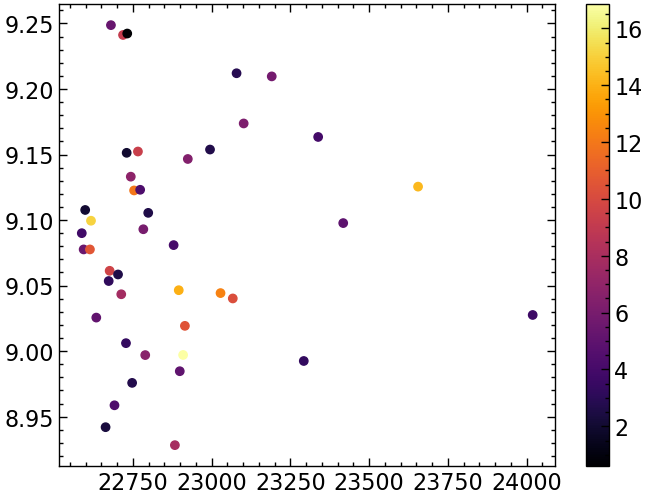

In [66]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [67]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.084), np.float64(0.081))

In [60]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/vmac', sep='  ')
fitlist

/tmp/ipykernel_94455/1623727015.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/vmac', sep='  ')


,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),A(S),A(Si),A(Na),oisorat
0,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.5


In [130]:
rats = np.arange(0.3, 0.9,0.02)
rats = np.repeat(rats, 1)
rats

array([0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ,
       0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72,
       0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 ])

In [131]:
len(rats)

31

In [132]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = np.round(rats,3)
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),A(S),A(Si),A(Na),oisorat
0,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.30
1,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.32
2,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.34
3,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.36
4,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.38
5,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.40
6,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.42
7,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.44
8,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.46
9,HD182040.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,9.58,8.0,7.3,9.138,7.95,6.76,7.19,6.79,0.48


In [133]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd182040/fitlist_comb', sep=' ', index=False)

In [2]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/Nov-05-2024-07-25-46_0.7358498135708336_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [3]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [4]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-2.071238383983584)

In [5]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    # sort by chi squared and take the first 2
    subdf.sort_values(by='red_chi_squared', inplace=True)
    # subdf = subdf.iloc[:2]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

/tmp/ipykernel_626072/245589135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


In [6]:
subdf

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
30,HD182040_clean.txt,-0.783,-2.126002,1.785475,0.0,5.217628,0.9


0.58 -0.24 0.35


Text(0.5, 0, '16O/18O ratio')

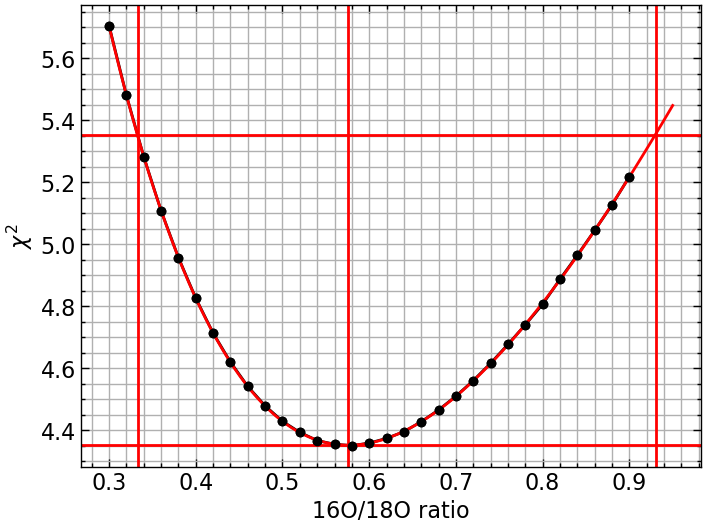

In [7]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 5)
x = np.linspace(0.3,0.95,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.634 -0.116 0.116


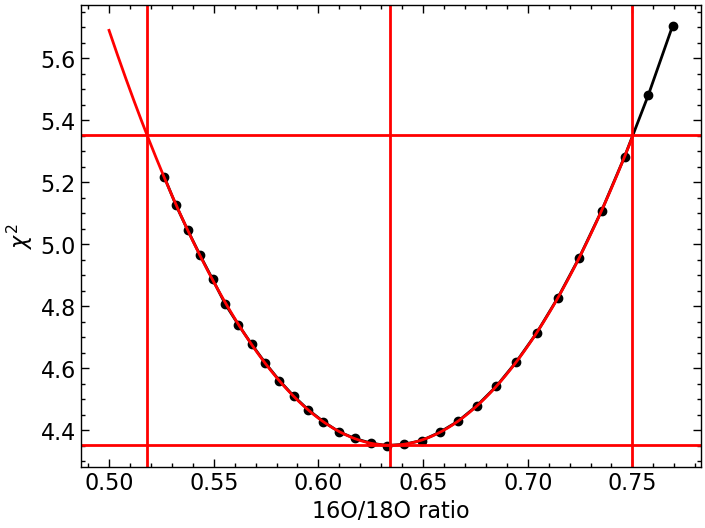

In [9]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.5, 0.75, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

In [70]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd182040/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed["O_Fe"]+solar_abundances['O'] > 7.8]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


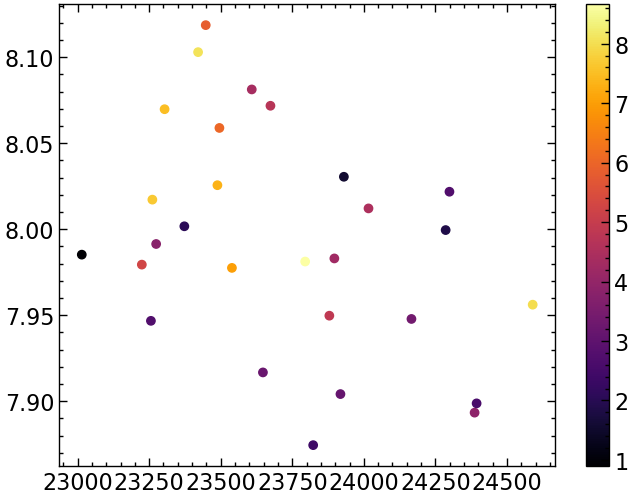

In [71]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [72]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(7.993), np.float64(0.063))

In [70]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.7653965517241377)